In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm
permute_switch = 0

In [2]:
if permute_switch == 0:
    permute_type = 'Permute regions'
    df = pd.read_csv('output_data/permute_pr_results.csv')
elif permute_switch == 1:
    permute_type = 'Permute TP'
    df = pd.read_csv('output_data/permute_pt_results.csv')
df_ac_gd = pd.read_csv('output_data/connectivity_gd.csv')
df_ac_lcc = pd.read_csv('output_data/connectivity_lcc.csv')
print(df.head())
print(df_ac_gd.head())
print(df_ac_lcc.head())

   id  gd_bf     gd_af    gd_ac  lcc_bf  lcc_af    lcc_ac
0   1    0.0  0.475000  0.21875     0.5  1.0000  0.444444
1   1    0.0  0.416667  0.43750     0.5  0.9375  0.777778
2   1    0.0  0.408333  0.46875     0.5  0.9375  0.722222
3   1    0.0  0.425000  0.40625     0.5  0.9375  0.666667
4   1    1.0  0.433333  0.34375     1.0  0.9375  0.555556
   seizure_id Hemisphere  BTP_all  ATP_all  ACTP_all  BTP_white  ATP_white  \
0           1      right      0.0     0.45    0.3125        0.0   0.441667   
1           2       left      0.5     0.00    0.7500        0.5   0.000000   
2           3       left      1.0     0.50    0.6250        1.0   0.500000   
3           4       left      NaN     0.50    0.6000        NaN   0.500000   
4           5      right      1.0      NaN    0.0000        1.0        NaN   

   ACTP_white  BTP_grey  ATP_grey  ACTP_grey  
0       0.250       0.0  0.191667    0.21875  
1       0.750       0.5  0.000000    0.75000  
2       0.625       1.0  0.500000    0.625

In [3]:
def calculate_difference(df, df_ac_gd, df_ac_lcc, sample_id):
    sample_gd_bf = df.loc[df['id'] == sample_id, 'gd_bf'].copy()
    sample_gd_af = df.loc[df['id'] == sample_id, 'gd_af'].copy()
    sample_gd_ac = df.loc[df['id'] == sample_id, 'gd_ac'].copy()
    sample_lcc_bf = df.loc[df['id'] == sample_id, 'lcc_af'].copy()
    sample_lcc_af = df.loc[df['id'] == sample_id, 'lcc_bf'].copy()
    sample_lcc_ac = df.loc[df['id'] == sample_id, 'lcc_ac'].copy()
    sample_gd_d_bf_af = sample_gd_bf - sample_gd_af
    sample_gd_dba = sample_gd_bf - sample_gd_ac
    sample_gd_daa = sample_gd_af - sample_gd_ac
    sample_lcc_d_bf_af = sample_lcc_bf - sample_lcc_af
    sample_lcc_dba = sample_lcc_bf - sample_lcc_ac
    sample_lcc_daa = sample_lcc_af - sample_lcc_ac

    actual_gd_bf = df_ac_gd[df_ac_gd['seizure_id'] == sample_id].copy()
    actual_gd_bf = actual_gd_bf['BTP_all'].to_numpy()[0]
    actual_gd_af = df_ac_gd[df_ac_gd['seizure_id'] == sample_id].copy()
    actual_gd_af = actual_gd_af['ATP_all'].to_numpy()[0]
    actual_gd_ac = df_ac_gd[df_ac_gd['seizure_id'] == sample_id].copy()
    actual_gd_ac = actual_gd_ac['ACTP_all'].to_numpy()[0]
    actual_lcc_bf = df_ac_lcc[df_ac_lcc['seizure_id'] == sample_id].copy()
    actual_lcc_bf = actual_lcc_bf['BTP_all'].to_numpy()[0]
    actual_lcc_af = df_ac_lcc[df_ac_lcc['seizure_id'] == sample_id].copy()
    actual_lcc_af = actual_lcc_af['ATP_all'].to_numpy()[0]
    actual_lcc_ac = df_ac_lcc[df_ac_lcc['seizure_id'] == sample_id].copy()
    actual_lcc_ac = actual_lcc_ac['ACTP_all'].to_numpy()[0]
    actual_gd_d_bf_af = actual_gd_bf - actual_gd_af
    actual_gd_dba = actual_gd_bf - actual_gd_ac
    actual_gd_daa = actual_gd_af - actual_gd_ac
    actual_lcc_d_bf_af = actual_lcc_bf - actual_lcc_af
    actual_lcc_dba = actual_lcc_bf - actual_lcc_ac
    actual_lcc_daa = actual_lcc_af - actual_lcc_ac

    dict0 = {
        "sample_gd_BTP" : sample_gd_bf,
        "sample_gd_ATP" : sample_gd_af,
        "sample_gd_ACTP" : sample_gd_ac,
        "sample_lcc_BTP" : sample_lcc_bf,
        "sample_lcc_ATP" : sample_lcc_af,
        "sample_lcc_ACTP" : sample_lcc_ac,
        "actual_gd_BTP" : actual_gd_bf,
        "actual_gd_ATP" : actual_gd_af,
        "actual_gd_ACTP" : actual_gd_ac,
        "actual_lcc_BTP" : actual_lcc_bf,
        "actual_lcc_ATP" : actual_lcc_af,
        "actual_lcc_ACTP" : actual_lcc_ac

    }

    dict1 = {
        "sample_gd_d_bf_af" : sample_gd_d_bf_af,
        "sample_gd_dba" : sample_gd_dba,
        "sample_gd_daa" : sample_gd_daa,
        "sample_lcc_d_bf_af" : sample_lcc_d_bf_af,
        "sample_lcc_dba" : sample_lcc_dba,
        "sample_lcc_daa" : sample_lcc_daa,
        "actual_gd_d_bf_af" : actual_gd_d_bf_af,
        "actual_gd_dba" : actual_gd_dba,
        "actual_gd_daa" : actual_gd_daa,
        "actual_lcc_d_bf_af" : actual_lcc_d_bf_af,
        "actual_lcc_dba" : actual_lcc_dba,
        "actual_lcc_daa" : actual_lcc_daa
    }

    return dict0, dict1


In [4]:
def calculate_p_value(sample, actual):
    sample = sample[~np.isnan(sample)]
    if sample.size == 0:
        return np.nan
    mu, std = norm.fit(sample)
    p_value = norm.cdf(actual, mu, std)
    return p_value

In [5]:

def show_subplot(difference_dict, sample_id, show_figure, permute_type):
    text_list = show_figure.split("_")
    if text_list[1] == 'lcc':
        method = 'Largest CC'
    else:
        method = 'Graph Density'
    if text_list[2] == 'd':
        dif_type = 'BTP & ATP'
    elif text_list[2] == 'dba':
        dif_type = 'BTP & ACTP'
    elif text_list[2] == 'daa':
        dif_type = 'ATP & ACTP'
    
    sample = difference_dict[f'sample{show_figure}']
    actual = difference_dict[f'actual{show_figure}']
    p_value = calculate_p_value(sample, actual)
    ylim_max = 2
    show_text = f'Seizure {sample_id}\n{permute_type}'
    sns.kdeplot(sample, color="blue", fill=True)
    plt.text(-1.85, ylim_max-0.3, show_text, color='black', ha='left', fontweight='bold')
    plt.axvline(x=actual, color='red', linestyle='--')
    plt.text(actual+0.05, 0.05, f'x = {actual:.4f}\nP = {p_value:.4f}', color='red', ha='left')
    plt.title(f'PDF {method} {dif_type}')
    plt.xlim([-2, 2])
    plt.ylim([0, ylim_max])
    plt.xlabel('Connection difference')
    plt.ylabel('Probability')

In [6]:
def save_all_p_values(length, df, df_ac_gd, df_ac_lcc):
    types_list = ['_gd_d_bf_af', '_gd_dba', '_gd_daa', '_lcc_d_bf_af', '_lcc_dba', '_lcc_daa']
    list0 = []
    for i in range(1, length+1):
        dict1 = calculate_difference(df, df_ac_gd, df_ac_lcc, i)[1]
        list1 = []
        for types in types_list:
            sample = dict1[f'sample{types}']
            actual = dict1[f'actual{types}']
            p_value = calculate_p_value(sample, actual)
            list1.append(p_value)
        list0.append(list1)
    list0 = np.array(list0)
    p_df = pd.DataFrame(
        {
            'id' : [i for i in range(1, length + 1)],
            'gd_d_bf_af' : list0[:, 0], 
            'gd_dba' : list0[:, 1], 
            'gd_daa' : list0[:, 2], 
            'lcc_d_bf_af' : list0[:, 3], 
            'lcc_dba' : list0[:, 4], 
            'lcc_daa' : list0[:, 5]
        }
    )
    return p_df

In [7]:
sample_id = 2
connectivity_dict, difference_dict = calculate_difference(df, df_ac_gd, df_ac_lcc, sample_id)

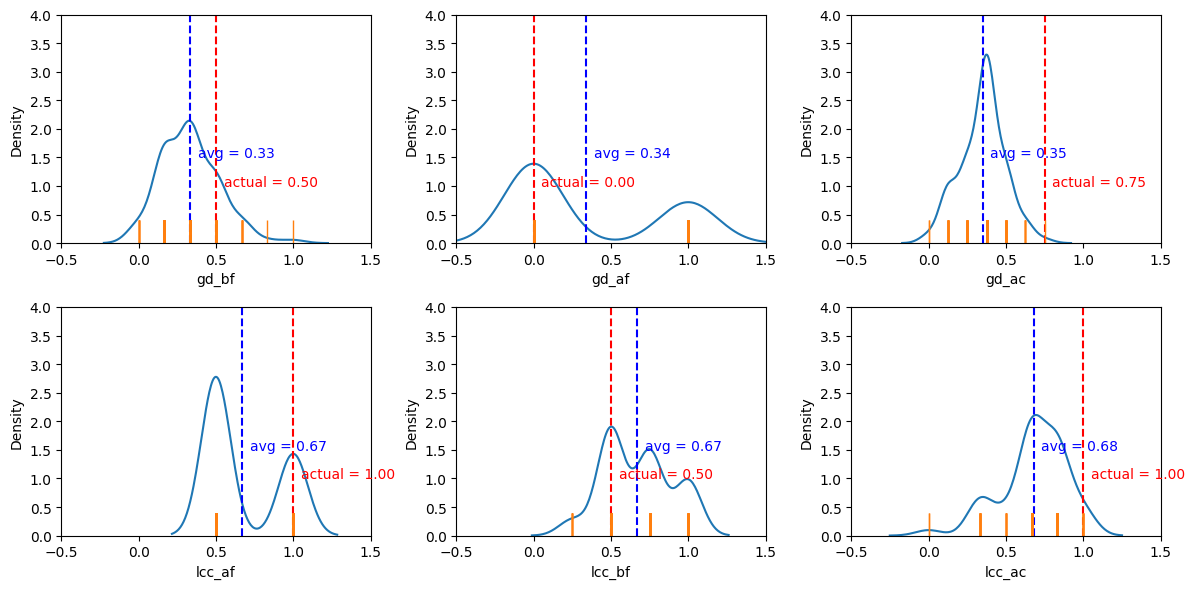

In [8]:
def show_con_subplot(dict1, show_figure):
    sample = dict1[f'sample{show_figure}']
    sample = sample.dropna()
    actual = dict1[f'actual{show_figure}']
    sns.kdeplot(sample, fill=False)
    plt.axvline(x=sample.mean(), color='blue', linestyle='--')
    plt.axvline(x=actual, color='red', linestyle='--')
    plt.text(sample.mean()+0.05, 1.5, f'avg = {sample.mean():.2f}', color='blue', ha='left')
    plt.text(actual+0.05, 1, f'actual = {actual:.2f}', color='red', ha='left')
    # sns.histplot(data=sample, bins=10, stat='probability', kde=True, common_norm=False)
    sns.rugplot(data=sample, height=.1)
    plt.xlim([-0.5, 1.5])
    plt.ylim([0, 4])

category_list = ["gd_BTP", "gd_ATP", "gd_ACTP", "lcc_BTP", "lcc_ATP", "lcc_ACTP"]
plt.figure(figsize=(12, 6))
for category in enumerate(category_list):
    plt.subplot(2, 3, category[0]+1)
    show_figure = f'_{category[1]}'
    show_con_subplot(connectivity_dict, show_figure)
plt.tight_layout()
plt.show()


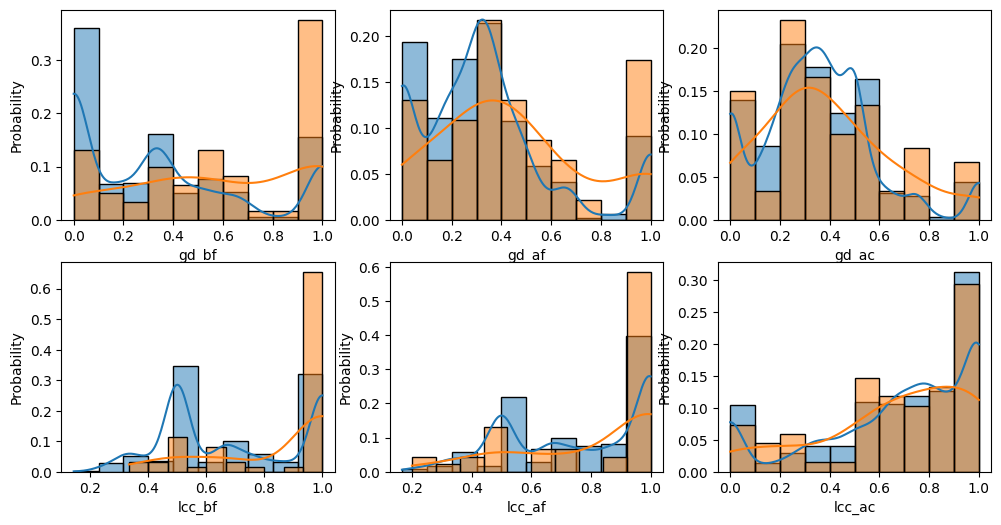

In [9]:
def plot_hist_con_subplot(df1, df2, show_figure):
    sns.histplot(data=df1, bins=10, stat='probability', kde=True, common_norm=False)
    sns.histplot(data=df2, bins=10, stat='probability', kde=True, common_norm=False)
category_list1 = ["gd_bf", "gd_af", "gd_ac", "lcc_bf", "lcc_af", "lcc_ac"]
category_list2 = ["BTP_all", "ATP_all", "ACTP_all", "BTP_all", "ATP_all", "ACTP_all"]
plt.figure(figsize=(12, 6))
for category in enumerate(category_list1):
    plt.subplot(2, 3, category[0]+1)
    show_figure = f'_{category[1]}'
    if category[0] < 3:
        actual_df = df_ac_gd[category_list2[category[0]]]
    else:
        actual_df = df_ac_lcc[category_list2[category[0]]]
    plot_hist_con_subplot(df[category[1]],actual_df, show_figure)


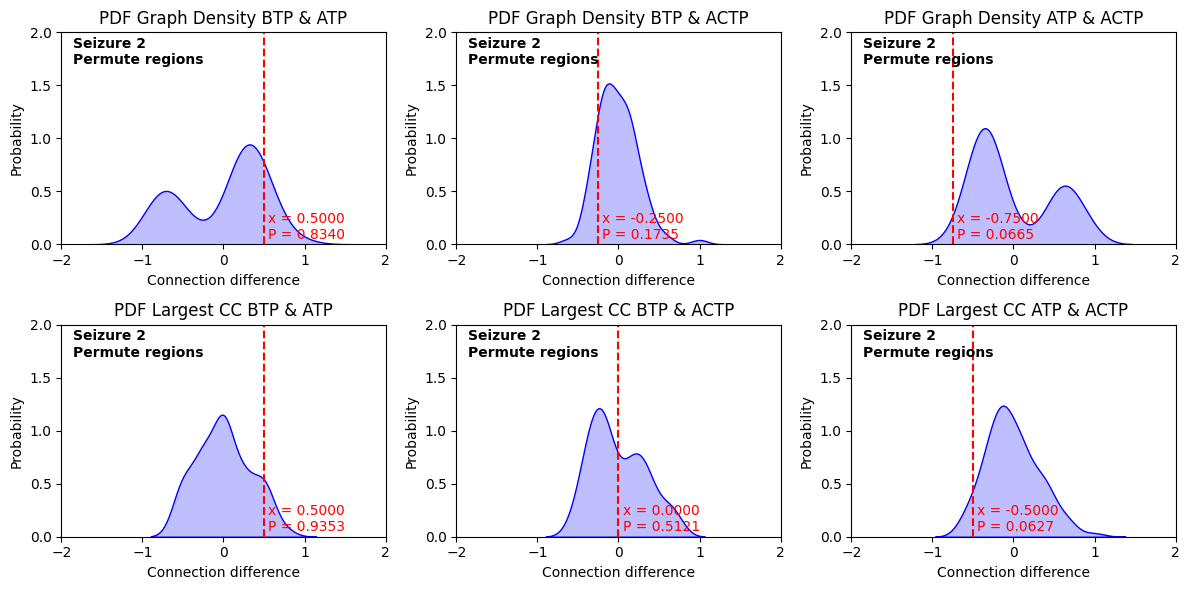

In [10]:


category_list = ["gd_d_bf_af", "gd_dba", "gd_daa", "lcc_d_bf_af", "lcc_dba", "lcc_daa"]
plt.figure(figsize=(12, 6))
for category in enumerate(category_list):
    plt.subplot(2, 3, category[0]+1)
    show_figure = f'_{category[1]}'
    show_subplot(difference_dict, sample_id, show_figure, permute_type)

plt.tight_layout()
plt.show()

In [11]:
p_dict = save_all_p_values(68, df, df_ac_gd, df_ac_lcc)
print(p_dict.head())
print(p_dict.shape)

   id  gd_d_bf_af    gd_dba    gd_daa  lcc_d_bf_af   lcc_dba   lcc_daa
0   1    0.156699  0.225457  0.903984     0.002989  0.004614  0.881334
1   2    0.834022  0.173503  0.066542     0.935265  0.512063  0.062726
2   3    0.892075  0.843413  0.315974     0.738477  0.672321  0.447510
3   4         NaN       NaN  0.342735          NaN       NaN       NaN
4   5         NaN  0.960127       NaN          NaN       NaN       NaN
(68, 7)


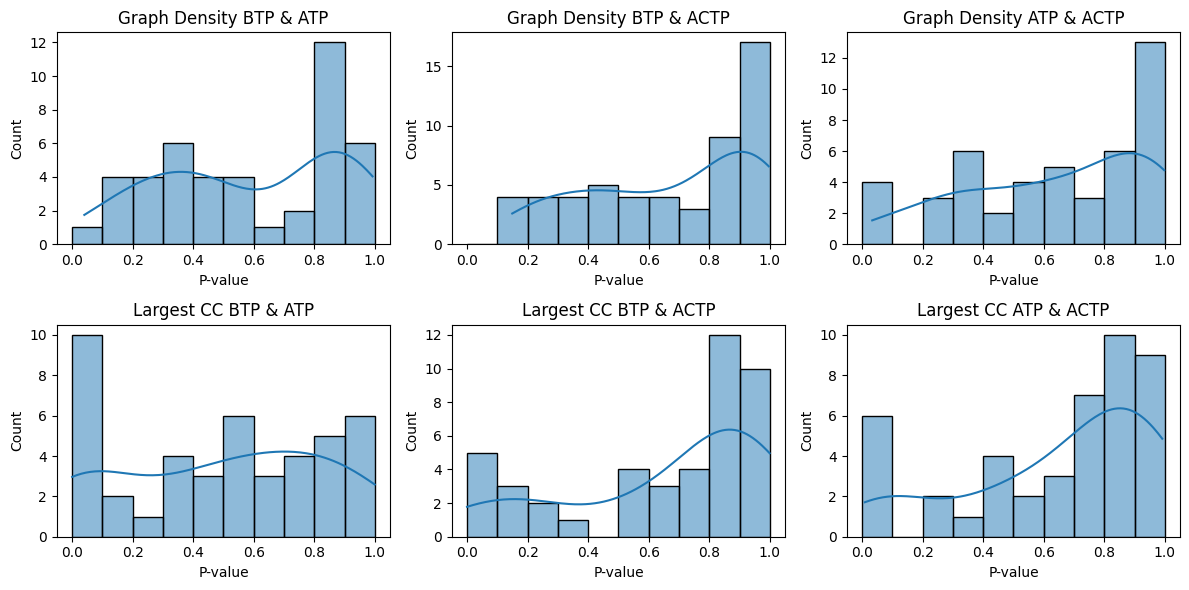

In [15]:
def plot_his(df, category, if_sort=False):
    extracted_data = df[["id",category]]
    extracted_data = extracted_data.dropna(subset=[category])
    if if_sort:
        extracted_data = extracted_data.sort_values(by=category, ascending=True)
        extracted_data['id'] = range(1, len(extracted_data) + 1)
    sns.histplot(extracted_data, x=category, binrange=[0, 1], bins=10, kde=True)
    # sns.barplot(extracted_data, x="id", y=category, width=0.8)
    # plt.xticks([])
    # plt.xlabel("Seizure")
    plt.xlabel("P-value")
    tittle_list = category.split("_")
    contype = "Graph Density" if tittle_list[0] == "gd" else "Largest CC"
    if tittle_list[1] == "d": 
        cattype = "BTP & ATP"
    elif tittle_list[1] == "dba": 
        cattype = "BTP & ACTP"
    else:
        cattype = "ATP & ACTP"
    plt.title(f"{contype} {cattype}")
    

category_list = ["gd_d_bf_af", "gd_dba", "gd_daa", "lcc_d_bf_af", "lcc_dba", "lcc_daa"]
plt.figure(figsize=(12, 6))
for category in enumerate(category_list):
    plt.subplot(2, 3, category[0]+1)
    plot_his(p_dict, category[1], True)

plt.tight_layout()
plt.show()
